In [3]:
import pandas as pd
from pandas import read_csv

# 파일 경로와 결과(RE) 값을 매핑한 리스트
files_with_results = (
    ('datasets/role_defeat.csv', 'DE'), ('datasets/role_draw.csv', 'DR'), ('datasets/role_victory.csv', 'VI')
)

# 데이터프레임 목록 생성
dataframes = [read_csv(filepath).assign(RE=result) for filepath, result in files_with_results]

# 하나의 데이터프레임으로 병합
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,I,T,R,E,A,DE,DA,H,M,RE
0,1,1,T,0,0,8,2947,1425,4611,DE
1,1,1,D,1,0,3,1818,0,650,DE
2,1,1,D,2,0,7,4735,487,308,DE
3,1,1,S,1,0,3,2078,2748,0,DE
4,1,1,S,1,1,3,269,5848,189,DE
...,...,...,...,...,...,...,...,...,...,...
9008,466,2,T,17,3,8,7147,351,3898,VI
9009,466,2,D,19,0,9,6344,0,847,VI
9010,466,2,D,26,1,7,9108,150,165,VI
9011,466,2,S,7,22,6,2734,8985,0,VI


In [4]:
combined_df['R'].unique()

array(['T', 'D', 'S', 'A'], dtype=object)

In [33]:
filter_values = 'T', 'D', 'S'
filtered_df = combined_df[combined_df['R'].isin(filter_values)].reset_index(drop=True)
filtered_df

,I,T,R,E,A,DE,DA,H,M,RE
0,1,1,T,0,0,8,2947,1425,4611,DE
1,1,1,D,1,0,3,1818,0,650,DE
2,1,1,D,2,0,7,4735,487,308,DE
3,1,1,S,1,0,3,2078,2748,0,DE
4,1,1,S,1,1,3,269,5848,189,DE
...,...,...,...,...,...,...,...,...,...,...
9007,466,2,T,17,3,8,7147,351,3898,VI
9008,466,2,D,19,0,9,6344,0,847,VI
9009,466,2,D,26,1,7,9108,150,165,VI
9010,466,2,S,7,22,6,2734,8985,0,VI


In [48]:
from pandas import DataFrame

# 기준 설정
group_cols = ['I', 'T', 'RE']
required_counts = ('T', 1), ('D', 2), ('S', 2)

# 기본값이 될 컬럼 (group_cols + 'R' 제외)
default_cols = set(filtered_df.columns) - set(group_cols) - {'R'}
default_values = {col: 0 for col in default_cols}

# 부족한 행들을 저장할 리스트
missing_rows = []

# 그룹별로 확인
for group_keys, group_df in filtered_df.groupby(group_cols):
    r_counts = group_df['R'].value_counts()

    for r_value, required_count in required_counts:
        current_count = r_counts.get(r_value, 0)
        missing_count = required_count - current_count

        for _ in range(missing_count):
            new_row = dict(zip(group_cols, group_keys))
            new_row |= default_values
            new_row['R'] = r_value
            missing_rows.append(new_row)

# 결과 병합
result_df = pd.concat([filtered_df, DataFrame(missing_rows)], ignore_index=True)
result_df

,I,T,R,E,A,DE,DA,H,M,RE
0,1,1,T,0,0,8,2947,1425,4611,DE
1,1,1,D,1,0,3,1818,0,650,DE
2,1,1,D,2,0,7,4735,487,308,DE
3,1,1,S,1,0,3,2078,2748,0,DE
4,1,1,S,1,1,3,269,5848,189,DE
...,...,...,...,...,...,...,...,...,...,...
9045,363,2,S,0,0,0,0,0,0,VI
9046,363,2,S,0,0,0,0,0,0,VI
9047,379,1,T,0,0,0,0,0,0,DE
9048,396,1,T,0,0,0,0,0,0,VI


In [53]:
import pandas as pd

# 'R' 열에 대해 지정된 순서(filter_values)를 갖는 범주형 데이터 타입을 정의
r_dtype = pd.CategoricalDtype(categories=filter_values, ordered=True)

# 'R' 열을 위에서 정의한 범주형 데이터 타입으로 변환
result_df['R'] = result_df['R'].astype(r_dtype)

# 'RE', 'I', 'T', 'R' 열을 기준으로 오름차순 정렬하고, 인덱스를 초기화
sorted_df = result_df.sort_values(by=['RE', 'I', 'T', 'R'], ascending=True).reset_index(drop=True)

# 정렬된 DataFrame 출력
sorted_df

,I,T,R,E,A,DE,DA,H,M,RE
0,1,1,T,0,0,8,2947,1425,4611,DE
1,1,1,D,1,0,3,1818,0,650,DE
2,1,1,D,2,0,7,4735,487,308,DE
3,1,1,S,1,0,3,2078,2748,0,DE
4,1,1,S,1,1,3,269,5848,189,DE
...,...,...,...,...,...,...,...,...,...,...
9045,466,2,T,17,3,8,7147,351,3898,VI
9046,466,2,D,19,0,9,6344,0,847,VI
9047,466,2,D,26,1,7,9108,150,165,VI
9048,466,2,S,7,22,6,2734,8985,0,VI


In [285]:
from math import floor, log10

# 자리수를 분리할 열
split_columns = {'E', 'A', 'DE', 'DA', 'H', 'M'}

# 새로운 DataFrame 생성
expanded_df = DataFrame()

# 열 순회
for col in sorted_df.columns:
    if col in split_columns:
        max_val = sorted_df[col].max()
        max_digit = floor(log10(max_val))
        for digit_pos in range(max_digit, -1, -1):
            new_col_name = f'{col}{digit_pos}'
            expanded_df[new_col_name] = sorted_df[col] // 10 ** digit_pos % 10
    else:
        expanded_df[col] = sorted_df[col]
expanded_df

,I,T,R,E1,E0,A1,A0,DE1,DE0,DA4,...,H3,H2,H1,H0,M4,M3,M2,M1,M0,RE
0,1,1,T,0,0,0,0,0,8,0,...,1,4,2,5,0,4,6,1,1,DE
1,1,1,D,0,1,0,0,0,3,0,...,0,0,0,0,0,0,6,5,0,DE
2,1,1,D,0,2,0,0,0,7,0,...,0,4,8,7,0,0,3,0,8,DE
3,1,1,S,0,1,0,0,0,3,0,...,2,7,4,8,0,0,0,0,0,DE
4,1,1,S,0,1,0,1,0,3,0,...,5,8,4,8,0,0,1,8,9,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,466,2,T,1,7,0,3,0,8,0,...,0,3,5,1,0,3,8,9,8,VI
9046,466,2,D,1,9,0,0,0,9,0,...,0,0,0,0,0,0,8,4,7,VI
9047,466,2,D,2,6,0,1,0,7,0,...,0,1,5,0,0,0,1,6,5,VI
9048,466,2,S,0,7,2,2,0,6,0,...,8,9,8,5,0,0,0,0,0,VI


In [286]:
expanded_df.nunique()

I      466
T        2
R        3
E1       6
E0      10
A1       7
A0      10
DE1      3
DE0     10
DA4      3
DA3     10
DA2     10
DA1     10
DA0     10
H4       3
H3      10
H2      10
H1      10
H0      10
M4       4
M3      10
M2      10
M1      10
M0      10
RE       3
dtype: int64

```python
cleaned_df = expanded_df.drop(columns=['I', 'RE'])
cleaned_df

2025-10-14 07:00:31.129014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760425231.391235    1273 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760425231.459211    1273 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760425231.978985    1273 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760425231.979018    1273 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760425231.979020    1273 computation_placer.cc:177] computation placer alr

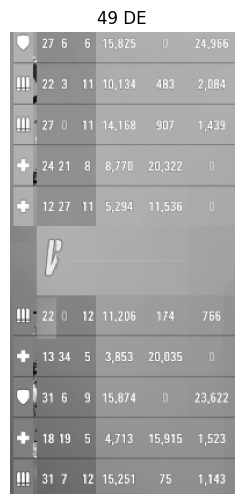

2025-10-14 07:00:40.778768: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [288]:
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.io import decode_png, read_file
import tensorflow as tf
from tensorflow.image import resize
from tensorflow import int32
from tensorflow.strings import split, upper, substr, to_number
from matplotlib.pyplot import figure, title, axis, imshow, show


def load_and_preprocess_image(file_path):
    """이미지 파일을 읽고 전처리합니다."""
    image = decode_png(read_file(file_path), channels=1)  # PNG 파일을 흑백 이미지로 디코딩
    # 자르기: 세로 방향은 230~930행, 가로 방향은 530~1370열 선택
    cropped = image[230:930, 530:1370]
    # 특정 열 범위 선택
    selected_columns = tf.concat((
        cropped[:, :40],  # 원본 이미지 기준: 530~570 열
        cropped[:, 390:420],  # 920~950 열
        cropped[:, 450:480],  # 980~1010 열
        cropped[:, 500:530],  # 1030~1060 열
        cropped[:, 570:640],  # 1100~1170 열
        cropped[:, 670:740],  # 1200~1270 열
        cropped[:, 770:]  # 1300 열 이후부터 끝까지
    ), axis=1)
    # 크기를 (400, 400)으로 조정 (종횡비 유지)
    resized = resize(selected_columns, (400, 400), preserve_aspect_ratio=True)

    file_name = split(file_path, '/')[-1]
    tokens = split(file_name, '_')
    # 앞 2글자를 대문자로 변환
    prefix = upper(substr(tokens[0], 0, 2))
    # 숫자 추출 및 정수로 변환
    number_str = split(tokens[1], '.')[0]
    number = to_number(number_str, int32)
    
    return resized, number, prefix


def display_image(image_tensor, number_tensor, prefix_tensor):
    """단일 흑백 이미지 텐서를 화면에 표시합니다."""
    figure(figsize=(6, 6))
    title(f'{number_tensor} {prefix_tensor.numpy().decode()}')
    axis('off')  # 축 숨기기
    imshow(image_tensor, cmap='gray')  # 이미지 표시 (회색조)
    show()


# 'datasets' 폴더 내의 모든 하위 디렉토리 및 파일 목록 생성
dataset = Dataset.list_files('datasets/*/*')
# 이미지 로드 및 전처리 함수 적용 (병렬 처리)
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
# 배치 크기 32로 묶고, 성능을 위한 prefetch 설정
dataset = dataset.batch(32).prefetch(AUTOTUNE)
# 첫 번째 배치에서 첫 번째 이미지를 표시
for images, numbers, prefixes in dataset.take(1):
    display_image(images[0], numbers[0], prefixes[0])

In [15]:
X, y = dataset[0]

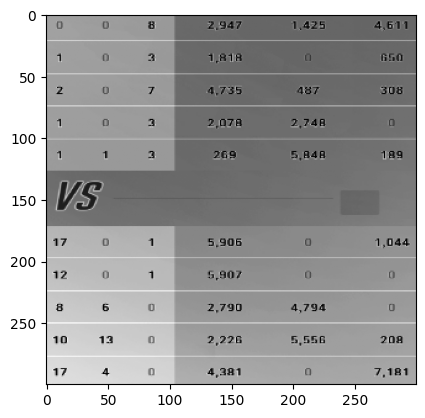

In [16]:
from matplotlib.pyplot import imshow, show

imshow(X[0], 'binary')
show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(ndarray_png.reshape(-1, 1)).reshape(-1, 300, 300, 1)
int_outputs = 210
y = frame_column.values.reshape(-1, int_outputs).T
int_slice = -10
X_train, tuple_y_train = X[:int_slice], tuple(y[:, :int_slice])
X_valid, tuple_y_valid = X[int_slice:], tuple(y[:, int_slice:])
X_train.shape, len(tuple_y_train), X_valid.shape, len(tuple_y_valid)

((889, 300, 300, 1), 210, (10, 300, 300, 1), 210)

In [9]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

X_shape = X_train.shape[1:]

In [26]:
clear_session()
inputs = Input(X_shape)
flatten = Flatten()(inputs)
dense_1 = Dense(300, 'relu')(flatten)
dense_2 = Dense(100, 'relu')(dense_1)
outputs = tuple(Dense(10, 'softmax', name=f'dense_3_{i}')(dense_2) for i in range(1, int_outputs + 1))
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 90000)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 300)       │ 27,000,300 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     30,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_1 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_2 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_3 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_4 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_5 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_6 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_7 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_8 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_9 (Dense)   │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_10 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_11 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_12 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_13 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_14 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_15 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_16 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_17 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_18 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_19 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_20 (Dense)  │ (None, 10)        │      1,010 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 27,242,500 (103.92 MB)

 Trainable params: 27,242,500 (103.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import Callback
from numpy import array


class Logger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f'Epoch {epoch + 1}/{self.params["epochs"]}' +
            f'\nloss: {logs["loss"]:.4f}' +
            f' - accuracy: {array([logs[f"dense_3_{i}_accuracy"] for i in range(1, int_outputs + 1)]).mean():.4f}' +
            f' - val_loss: {logs["val_loss"]:.4f}' +
            f' - val_accuracy: {array([logs[f"val_dense_3_{i}_accuracy"] for i in range(1, int_outputs + 1)]).mean():.4f}'
        )

In [28]:
model.compile('SGD', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    X_train,
    tuple_y_train,
    epochs=1000,
    verbose=0,
    callbacks=(EarlyStopping(patience=10, restore_best_weights=True), Logger()),
    validation_data=(X_valid, tuple_y_valid)
)

2025-09-28 07:37:04.954034: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:04.963266: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.198257: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.235718: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45412', 12 bytes spill stores, 12 bytes spill loads

2025-09-28 07:37:05.237724: I extern

Epoch 1/1000
loss: 842547986432.0000 - accuracy: 0.2901 - val_loss: 461.0714 - val_accuracy: 0.3181
Epoch 2/1000
loss: 446.5577 - accuracy: 0.3421 - val_loss: 433.7435 - val_accuracy: 0.3571
Epoch 3/1000
loss: 402.9878 - accuracy: 0.3886 - val_loss: 373.7462 - val_accuracy: 0.4124
Epoch 4/1000
loss: 352.2129 - accuracy: 0.4315 - val_loss: 344.7107 - val_accuracy: 0.4248
Epoch 5/1000
loss: 335.7769 - accuracy: 0.4371 - val_loss: 337.0344 - val_accuracy: 0.4219
Epoch 6/1000
loss: 330.0737 - accuracy: 0.4389 - val_loss: 334.0575 - val_accuracy: 0.4181
Epoch 7/1000
loss: 327.5916 - accuracy: 0.4394 - val_loss: 332.8746 - val_accuracy: 0.4181
Epoch 8/1000
loss: 326.4442 - accuracy: 0.4395 - val_loss: 332.0260 - val_accuracy: 0.4190
Epoch 9/1000
loss: 325.8358 - accuracy: 0.4399 - val_loss: 331.3776 - val_accuracy: 0.4219
Epoch 10/1000
loss: 325.4693 - accuracy: 0.4393 - val_loss: 331.3204 - val_accuracy: 0.4181
Epoch 11/1000
loss: 325.2470 - accuracy: 0.4394 - val_loss: 331.2391 - val_accur

In [29]:
y_proba = array(model.predict(X_valid[:1])).argmax(2).reshape(10, 21)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1, 6, 0, 3, 0, 5, 0, 6, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 1, 7, 2],
       [1, 2, 0, 0, 0, 6, 0, 7, 6, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 4, 0, 0, 0, 8, 0, 9, 5, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 4, 0, 5, 0, 3, 1, 4, 0, 0, 8, 1, 7, 6, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 6, 0, 2, 0, 0, 0, 0, 5, 6, 3, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 0, 5, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 5, 6, 3, 4],
       [1, 5, 0, 0, 0, 8, 0, 6, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 7, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 8, 0, 5, 0, 3, 0, 0, 0, 0, 6, 4, 4, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 6, 0, 2, 0, 0, 0, 0, 6, 8, 7, 3, 0, 0, 0, 0, 0]])

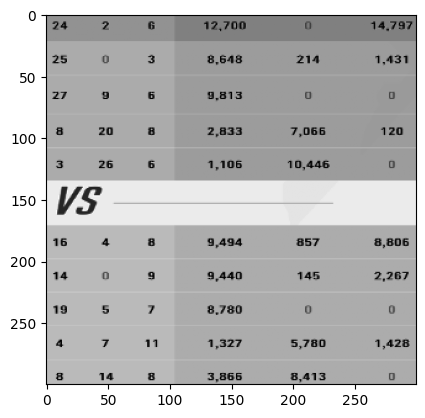

In [30]:
imshow(X_valid[0], 'binary')
show()

In [31]:
array(tuple_y_valid)[:, 0].reshape(10, 21)

array([[2, 4, 0, 2, 0, 6, 1, 2, 7, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 9, 7],
       [2, 5, 0, 0, 0, 3, 0, 8, 6, 4, 8, 0, 0, 2, 1, 4, 0, 1, 4, 3, 1],
       [2, 7, 0, 9, 0, 6, 0, 9, 8, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 2, 0, 0, 8, 0, 2, 8, 3, 3, 0, 7, 0, 6, 6, 0, 0, 1, 2, 0],
       [0, 3, 2, 6, 0, 6, 0, 1, 1, 0, 6, 1, 0, 4, 4, 6, 0, 0, 0, 0, 0],
       [1, 6, 0, 4, 0, 8, 0, 9, 4, 9, 4, 0, 0, 8, 5, 7, 0, 8, 8, 0, 6],
       [1, 4, 0, 0, 0, 9, 0, 9, 4, 4, 0, 0, 0, 1, 4, 5, 0, 2, 2, 6, 7],
       [1, 9, 0, 5, 0, 7, 0, 8, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 7, 1, 1, 0, 1, 3, 2, 7, 0, 5, 7, 8, 0, 0, 1, 4, 2, 8],
       [0, 8, 1, 4, 0, 8, 0, 3, 8, 6, 6, 0, 8, 4, 1, 3, 0, 0, 0, 0, 0]])

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

clear_session()
input_ = Input(X_shape)
conv_2d_1 = Conv2D(64, 7, padding='same', activation='relu', kernel_initializer='HeNormal')(input_)
max_pool_2d_1 = MaxPool2D()(conv_2d_1)
conv_2d_2 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_1)
conv_2d_3 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_2)
max_pool_2d_2 = MaxPool2D()(conv_2d_3)
conv_2d_4 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_2)
conv_2d_5 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_4)
max_pool_2d_3 = MaxPool2D()(conv_2d_5)
flatten = Flatten()(max_pool_2d_3)
dense_1 = Dense(128, 'relu', kernel_initializer='HeNormal')(flatten)
dropout_1 = Dropout(.5)(dense_1)
dense_2 = Dense(64, 'relu', kernel_initializer='HeNormal')(dropout_1)
dropout_2 = Dropout(.5)(dense_2)
dense_3 = [Dense(10, 'softmax', name=f'dense_3_{i}')(dropout_2) for i in range(1, int_outputs + 1)]
model = Model(inputs=input_, outputs=dense_3)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 300, 300,  │      3,200 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 150, 150,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 150, 150,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 150, 150,  │    147,584 │ conv2d_1[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 75, 75,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 75, 75,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 75, 75,    │    590,080 │ conv2d_3[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 37, 37,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 350464)    │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 44,859,520 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_1 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_2 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_3 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_4 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_5 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_6 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_7 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3_8 (Dense)   │ (None, 10)        │      1,290 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 46,240,308 (176.39 MB)

 Trainable params: 46,240,308 (176.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile('nadam', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    X_train,
    tuple_y_train,
    16,
    epochs=1000,
    verbose=0,
    callbacks=(EarlyStopping(patience=10, restore_best_weights=True), Logger()),
    validation_data=(X_valid, tuple_y_valid)
)

Epoch 1/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 2/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 3/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 4/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 5/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 6/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 7/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 8/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 9/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 10/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543
Epoch 11/1000
loss: nan - accuracy: nan - val_loss: nan - val_accuracy: 0.0543


F0000 00:00:1759046499.642028    7704 bfc_allocator.cc:719] Check failed: h != kInvalidChunkHandle 
